In [2]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
species = [iris.target_names[x] for x in iris.target]
iris  = pd.DataFrame(iris['data'],columns =['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'])
iris['Species'] = species

print(iris)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    

In [8]:
iris['count'] = 1
iris[['Species','count']].groupby('Species').count()
print(iris)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Species  count
0             5.1          3.5           1.4          0.2     setosa      1
1             4.9          3.0           1.4          0.2     setosa      1
2             4.7          3.2           1.3          0.2     setosa      1
3             4.6          3.1           1.5          0.2     setosa      1
4             5.0          3.6           1.4          0.2     setosa      1
5             5.4          3.9           1.7          0.4     setosa      1
6             4.6          3.4           1.4          0.3     setosa      1
7             5.0          3.4           1.5          0.2     setosa      1
8             4.4          2.9           1.4          0.2     setosa      1
9             4.9          3.1           1.5          0.1     setosa      1
10            5.4          3.7           1.5          0.2     setosa      1
11            4.8          3.4           1.6          0.2     setosa      1
12          

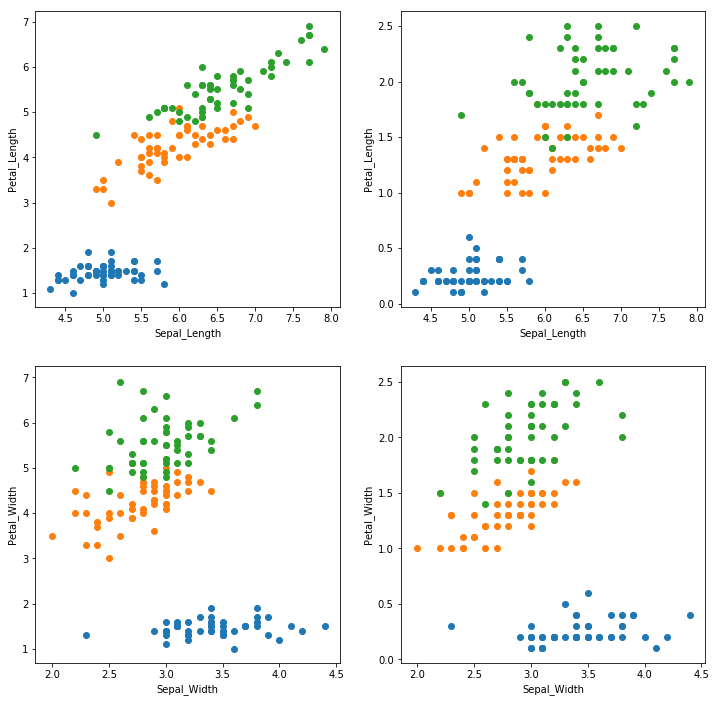

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_iris():
    setosa = iris[iris['Species']=='setosa']
    versicolor = iris[iris['Species']=='versicolor']
    virginica = iris[iris['Species']=='virginica']
    
    fig,ax = plt.subplots(2,2,figsize=(12,12))
    x     =['Sepal_Length','Sepal_Width']
    y     =['Petal_Length','Petal_Width']
    
    for i in range(2):
        for j in range(2):
            ax[i][j].scatter(setosa[x[i]],setosa[y[j]])
            ax[i][j].scatter(versicolor[x[i]],versicolor[y[j]])
            ax[i][j].scatter(virginica[x[i]],virginica[y[j]])
            ax[i][j].set_xlabel(x[i])
            ax[i][j].set_ylabel(y[i])
plot_iris()
            
    


In [16]:
import numpy as np
Features = np.array(iris[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']])
levels = {'setosa':0,'versicolor':1,'virginica':2}
Labels = np.array([levels[x] for x in iris['Species']])

(150, 4)


In [19]:
import sklearn.model_selection as ms

indx = range(Features.shape[0])
indx = ms.train_test_split(indx,test_size = 100)

X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])

X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])




In [20]:
import sklearn.preprocessing as preprocessing

scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)


In [21]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (50,))
model.fit(X_train,y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [23]:
import numpy.random as nr
nr.seed(123)
X_test = scale.transform(X_test)
scores = model.predict(X_test)

In [31]:
import sklearn.metrics as sklm
def print_metrics(labels,score):
    conf = sklm.confusion_matrix(labels,score)
    print("Score Setosa","Score Versicolor","Score Virginica")
    print("Actual Setosa",conf[0,0],conf[0,1],conf[0,2])
    print("Actual Versicolor",conf[1,0],conf[1,1],conf[1,2])
    print("Actual Virginica",conf[2,0],conf[2,1],conf[2,2])
    print("Accuracy",sklm.accuracy_score(labels,score))
    m = sklm.precision_recall_fscore_support(labels,score)
    print('numcase',m[3][0],m[3][1],m[3][2])
    print('setosa',m[1][0],m[1][1],m[1][2])
    print('versicolor',m[2][0],m[2][1],m[2][2])
    
print_metrics(y_test,scores)   

Score Setosa Score Versicolor Score Virginica
Actual Setosa 32 0 0
Actual Versicolor 0 28 3
Actual Virginica 0 7 30
Accuracy 0.9
numcase 32 31 37
setosa 1.0 0.903225806452 0.810810810811
versicolor 1.0 0.848484848485 0.857142857143


[1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


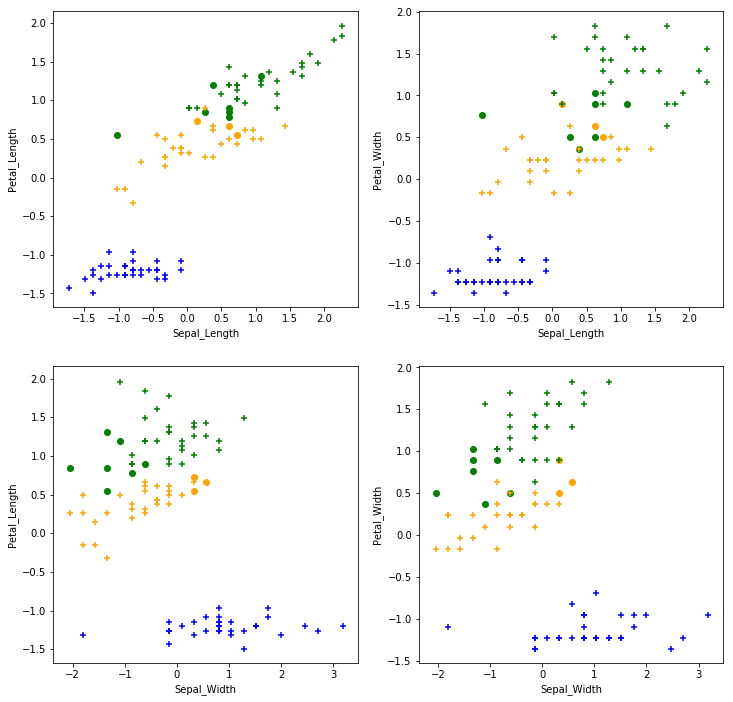

In [34]:
def plot_iris_score(iris, y_test, scores):
    '''Function to plot iris data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    print(true)

    
    ## Create data frame from the test data
    iris = pd.DataFrame(iris)
    levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
    iris['Species'] = [levels[x] for x in y_test]
    iris.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    
    for t in range(2): # loop over correct and incorect classifications
        setosa = iris[(iris['Species'] == 'setosa') & (true == t)]
        versicolor = iris[(iris['Species'] == 'versicolor') & (true == t)]
        virginica = iris[(iris['Species'] == 'virginica') & (true == t)]
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = markers[t], color = 'green')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_iris_score(X_test, y_test, scores)

In [33]:
help(np.equal)

Help on ufunc object:

equal = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array